In [1]:
import numpy as np
from matplotlib import pyplot as plt

Dodanie bibliotek


In [2]:
n_pts = 100 #liczba punktów
np.random.seed(0) # sprawia, że za kązdym razem pojawią się te same liczby
bias = np.ones(n_pts) # dodanie stałej
top_region = np.array([np.random.normal(10, 2, n_pts), np.random.normal(12,2,n_pts), bias]).T
bottom_regio = np.array([np.random.normal(5,2,n_pts), np.random.normal(6,2,n_pts), bias]).T
all_points = np.vstack((top_region, bottom_regio)) # złożenie dwóch wektorów 
# Losowe pierwsze parametry
# w1 = -0.2
# w2 = -0.35
# b = 3.5
line_parameters = np.matrix([np.zeros(3)]).T # używamy matrix, żeby był to wektor pionowy, aby móc wykonać mnożenie macierzy
# x1 = np.array([bottom_regio[:, 0].min(), top_region[:,0].max()])  # minimalna wartosc x
# x2 = (-b - w1*x1)/(w2)
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(2*n_pts, 1)

1. Losowanie liczb do wykresu 
2. Następnie tworzymy wektory puntków i łączymy je w jeden 
3. Dajemy **warunki początkowe**, żeby stowrzyć pierwszą losową **linię regresji**, którą następnie będziemy poprawiać 
* Wzór na linię regresji to: $0 = w1*x_{1} + w2*x_{2} + b$


Sigmoid, funkcja którą użyjemy do obliczenia prawdobodobieństwa przynależności do zbioru: 
**f = $\frac{1}{1+e^{-x}}$** \
Kody do edytowania tekstu w `Jupyter Notebook` Markdow jest <a href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/" target= "_blank" >pod tym linkiem</a> \
Do `matematycznych wzorów ` <a href="https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214" target="_blank"> tutaj </a>

In [7]:
def draw(x1, x2):
    ln = plt.plot(x1,x2,'-')
    
def sigmoid(score):
    return 1/(1+np.exp(-score))
def calculate_error(line_parameters, points, y):
    m = points.shape[0]
    p = sigmoid(points * line_parameters)
    cross_entrophy = (np.log(p).T * y + np.log(1-p).T *(1-y))/(-1*m)
    return cross_entrophy
def gradient_descent(line_parameters, points, y, alpha):
    m = points.shape[0]
    for i in range(2000):
        p = sigmoid(points*line_parameters)
        gradeint = points.T * (p - y) * (alpha/m)
        line_parameters = line_parameters - gradeint
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)
        x1 = np.array([points[:, 0].min(), points[:,0].max()])  # minimalna wartosc x
        x2 = (-b - w1*x1)/(w2)
    draw(x1,x2)
    return line_parameters

Funkcja do wyrysowania linii: `draw` \
Funkcja do obliczania prawdopodobieństwa `sigmoid`

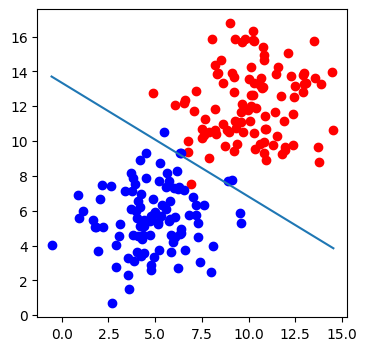

In [8]:
_, ax = plt.subplots(figsize= (4,4))
ax.scatter(top_region[:, 0], top_region[:, 1], color='r')
ax.scatter(bottom_regio[:, 0], bottom_regio[:, 1], color='b')
line_parameters = gradient_descent(line_parameters, all_points, y, 0.1)
# draw(x1,x2)
plt.show()

***
Rysowanie wykresu
***

In [9]:
linear_combination = all_points * line_parameters
probability = sigmoid(linear_combination)


Obliczanie prawdopodobieństwa za pomocą funkcji `sigmoid`

In [10]:
e = calculate_error(line_parameters, all_points, y)

Obliczanie błedu naszej linii odzielającej dwa zbiory. 
***
Błąd obliczamy za pomocą wzoru $ \frac{-\sum ln(p)*y + ln(1-p) *(1-y)}{m} $ 
***
Gdzie **p - prawdopodobieństwo, y-labels(0 lub 1), m-liczba punktów**

**Wzór na gradient: $\frac{pts * (p-y)}{m}$**